In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [2]:
Grand = pd.read_excel('/Users/lakisha/Desktop/Grand Total HUD 2010-2021CoC Homeless Assistance Program Housing Inventory Report.xls')

In [3]:
print (Grand)

    Years  Family Units  Family Beds  Adult Only Beds  Child Only Beds  \
0    2021        142349       425650           535165             3422   
1    2020        141849       434094           504476             3301   
2    2019        135468       418859           489164             3634   
3    2018        135370       420424           472526             3943   
4    2017        139725       430341           464676             4042   
5    2016        132654       413226           449853             4023   
6    2015        128707       396796           428525             4799   
7    2014        120857       366580           401461             4747   
8    2013        113178       343718           382541             4117   
9    2012        114237       349277           376318             3459   
10   2011        119505       360681           380292                0   
11   2010        106193       327605           353467                0   

    Total Yr Round Beds  Seasonal  Ov

In [4]:
Grand1 = Grand.drop(['Seasonal', 'Overflow/Voucher'], axis=1)
Grand1.head()

,Years,Family Units,Family Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Veteran Beds,Youth Beds
0,2021,142349,425650,535165,3422,964237,141090,29550
1,2020,141849,434094,504476,3301,941871,138558,27244
2,2019,135468,418859,489164,3634,911657,134576,23710
3,2018,135370,420424,472526,3943,868893,139266,24089
4,2017,139725,430341,464676,4042,899059,141541,23292


In [5]:

x = Grand1[['Family Units', 'Family Beds', 'Adult Only Beds', 'Child Only Beds','Youth Beds','Total Yr Round Beds']]
y = Grand1['Years']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7, 6) (7,)
(5, 6) (5,)


In [8]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [9]:
predictions = lm.predict(x_test)
predictions

array([2019.67491987, 2012.78879061, 2016.93278007, 2022.0118969 ,
       2012.62836196])

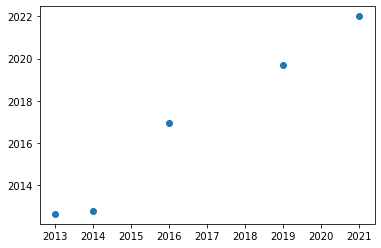

In [10]:
plt.scatter(y_test, predictions)

In [11]:

print("Score:", lm.score(x_test, y_test))

Score: 0.9125072156556521


# Model is accurate 91% of the time

# Examine Error

# Mean Absolute Error (MAE)

In [12]:
metrics.mean_squared_error(y_test, predictions)

0.7909347704729051

# Root Mean Squared Error (RMSE)

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.8893451357447821

# k-Fold Cross Validation

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create Folds

In [22]:
kfold = KFold(6, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 0  1  4  5  6  7  8  9 10 11], test: [2 3]
train: [ 0  1  2  3  5  6  7  8  9 11], test: [ 4 10]
train: [ 0  2  3  4  5  7  8  9 10 11], test: [1 6]
train: [ 1  2  3  4  5  6  8  9 10 11], test: [0 7]
train: [ 0  1  2  3  4  5  6  7  8 10], test: [ 9 11]
train: [ 0  1  2  3  4  6  7  9 10 11], test: [5 8]


/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [23]:
print(cross_val_score(lm, x,y, cv=6))

[-5.05494650e+00 -2.75792596e+25 -2.96200932e-02  6.61351876e-01
 -6.79723641e+00 -2.68712272e+01]
